### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Hypothesis Testing
     3.1 Price vs Nnumber of Bedroooms
         3.1a. Data prep for regression analysis 
         3.1b. Regression analysis
     3.2 Price vs Living Space
         3.2a. Data prep for regression analysis 
         3.2b. Regression analysis
     3.3 Price vs Living Space of 15 Closest Homes
         3.2a. Data prep for regression analysis 
         3.2b. Regression analysis


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_new_var.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Price category', 'has_basement', 'distance_to_city'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category,has_basement,distance_to_city
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Middle tier,0,10.458148
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,High tier,1,6.796267
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Low tier,0,13.601613
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,High tier,1,8.402784
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,High tier,0,32.210221


In [7]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'Unnamed: 0' : 'No'}, inplace = True)

In [8]:
df.head()

,No,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category,has_basement,distance_to_city
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Middle tier,0,10.458148
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,High tier,1,6.796267
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Low tier,0,13.601613
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,High tier,1,8.402784
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,High tier,0,32.210221


##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

No                  0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
Price category      0
has_basement        0
distance_to_city    0
dtype: int64

##### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(21599,)

##### Extreme values checks

C:\Users\shyro\AppData\Local\Temp\ipykernel_20812\1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

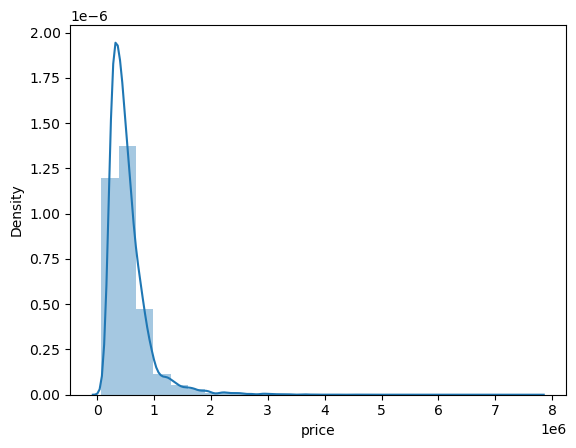

In [12]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [13]:
df['price'].mean() # Check the mean

540255.757118385

In [14]:
df['price'].median() # Check the median

450000.0

In [15]:
df['price'].max() # Check the max

7700000

### 3. Multiple regression

In [16]:
# split in train and test dataset, and x and y

X = df.drop(['No','id','date','price','Price category'],axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(15119, 20)
(6480, 20)


In [17]:
# create linear model

lr = LinearRegression()
lrmodel1 = lr.fit(X_train, y_train)

In [18]:
# print model coefficients

coef_lr = pd.Series(lrmodel1.coef_, index = X_train.columns)
print('Intercept:', lrmodel1.intercept_)
print()
print('Coefficients:')
print(coef_lr.round(4))

Intercept: 116921913.0894124

Coefficients:
bedrooms            -41703.9945
bathrooms            42607.1333
sqft_living            112.6361
sqft_lot                 0.1657
floors               -2140.3637
waterfront          538686.9905
view                 59099.7270
condition            29092.9624
grade                95020.0676
sqft_above              74.7483
sqft_basement           37.8877
yr_built             -2254.4683
yr_renovated            16.6172
zipcode               -566.3431
lat                 447023.2508
long                643548.9497
sqft_living15            8.9336
sqft_lot15              -0.1083
has_basement         -7441.3223
distance_to_city    -10453.8592
dtype: float64


In [19]:
# get p values for coefficients with statsmodel

#Fitting sm.OLS model
X_1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1935.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:06:43   Log-Likelihood:            -2.0566e+05
No. Observations:               15119   AIC:                         4.114e+05
Df Residuals:                   15099   BIC:                         4.115e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.169e+08   5.73e+06  

In [20]:
# split in train and test dataset, and x and y

X = df.drop(['No','id','date','price','Price category','floors','sqft_lot15','has_basement'],axis = 1) # remove variables with p-value > 0.05
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(15119, 17)
(6480, 17)


In [21]:
# create linear model

lr = LinearRegression()
lrmodel1 = lr.fit(X_train, y_train)

In [22]:
# print model coefficients

coef_lr = pd.Series(lrmodel1.coef_, index = X_train.columns)
print('Intercept:', lrmodel1.intercept_)
print()
print('Coefficients:')
print(coef_lr.round(4))

Intercept: 117887165.4479157

Coefficients:
bedrooms            -41523.4651
bathrooms            41669.5054
sqft_living            110.9672
sqft_lot                 0.1137
waterfront          538628.6883
view                 59204.5468
condition            29305.6175
grade                94735.8387
sqft_above              77.0851
sqft_basement           33.8821
yr_built             -2260.4927
yr_renovated            16.5704
zipcode               -570.3352
lat                 445737.3751
long                647666.4379
sqft_living15            8.8326
distance_to_city    -10494.6823
dtype: float64


In [23]:
# get p values for coefficients with statsmodel

#Fitting sm.OLS model
X_1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2297.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:06:43   Log-Likelihood:            -2.0566e+05
No. Observations:               15119   AIC:                         4.114e+05
Df Residuals:                   15102   BIC:                         4.115e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.179e+08    5.7e+06  

Text(0, 0.5, 'price predicted')

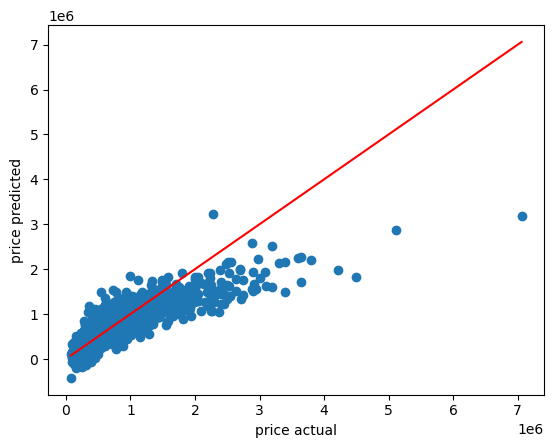

In [25]:
# predict y values based on model coefficients

pred_train = lrmodel1.predict(X_train)
pred_test = lr.predict(X_test)

plt.scatter(y_test,pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r")
plt.xlabel('price actual')
plt.ylabel('price predicted')

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, pred_test) # This is the mean squared error
r2 = r2_score(y_test, pred_test) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,lrmodel1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-4.15234651e+04  4.16695054e+04  1.10967214e+02  1.13662223e-01
  5.38628688e+05  5.92045468e+04  2.93056175e+04  9.47358387e+04
  7.70851477e+01  3.38820657e+01 -2.26049269e+03  1.65703554e+01
 -5.70335184e+02  4.45737375e+05  6.47666438e+05  8.83259726e+00
 -1.04946823e+04]
Mean squared error:  40696526029.75003
R2 score:  0.7159531436504694


In [28]:
pred_test

array([374907.86116894, 340246.17875348, 243584.76366392, ...,
       281861.88769726, 296005.44404458, 234751.85982573])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
data.head(30)

,Actual,Predicted
6113,277500,3.749079e+05
13550,290000,3.402462e+05
1960,250000,2.435848e+05
4501,567035,4.941182e+05
7088,309000,2.823912e+05
12066,156000,-6.547955e+04
13,400000,3.229692e+05
19228,580000,7.728000e+05
7244,416000,3.914635e+05
8019,460000,6.156862e+05


In [30]:
# export actual and predicted dataframe to .csv

data.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'actual_predicted.csv'))